# LogisticRegresion 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


importing Jupyter notebook from preprocess.ipynb


c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

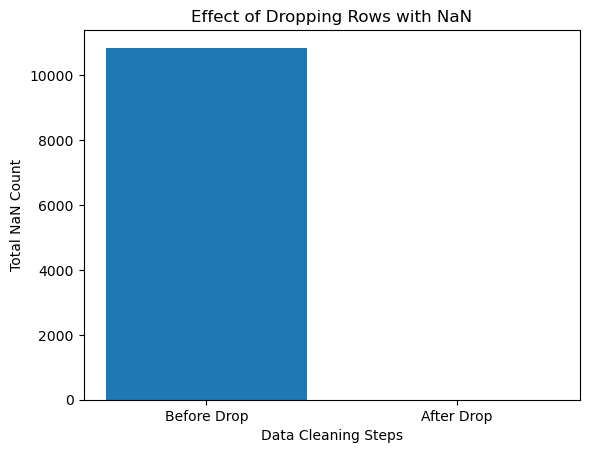

Art - FDIR
Torsk                  56507
Sei                    42495
Hyse                   39080
Lange                  17328
Uer (vanlig)           14151
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 121, dtype: int64


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
2,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12
4,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12
6,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12
9,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12
12,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12


In [2]:
import import_ipynb
from preprocess import df
df.head()

In [3]:

#Selecting features and target variable
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
            'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
            'Rundvekt']
X = df[features]
y = df['Art - FDIR']

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


#Making predictions
y_pred = model.predict(X_test)

#Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.6108277359729306
              precision    recall  f1-score   support

           0       0.63      0.76      0.69     11337
           1       0.56      0.42      0.48      8464

    accuracy                           0.61     19801
   macro avg       0.60      0.59      0.58     19801
weighted avg       0.60      0.61      0.60     19801



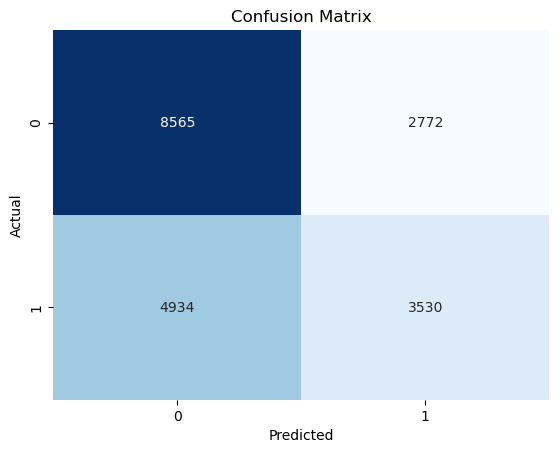

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test and y_pred are defined as in your code
cm = metrics.confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()